In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
df = pd.read_csv('ex2data1.txt',header=None)

In [100]:
df.values

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ],
       [45.08327748, 56.31637178,  0.        ],
       [61.10666454, 96.51142588,  1.        ],
       [75.02474557, 46.55401354,  1.        ],
       [76.0987867 , 87.42056972,  1.        ],
       [84.43281996, 43.53339331,  1.        ],
       [95.86155507, 38.22527806,  0.        ],
       [75.01365839, 30.60326323,  0.        ],
       [82.30705337, 76.4819633 ,  1.        ],
       [69.36458876, 97.71869196,  1.        ],
       [39.53833914, 76.03681085,  0.        ],
       [53.97105215, 89.20735014,  1.        ],
       [69.07014406, 52.74046973,  1.        ],
       [67.94685548, 46.67857411,  0.        ],
       [70.66150955, 92.92713789,  1.        ],
       [76.97878373, 47.57596365,  1.        ],
       [67.37202755, 42.83843832,  0.   

In [7]:
train_data = df.values

In [12]:
train_X = train_data[:,:-1]

In [13]:
train_y = train_data[:,-1:]

In [15]:
len(train_X[0])

2

In [17]:
train_X.shape[1]

2

In [18]:
feature_num = train_X.shape[1]
feature_num

2

In [19]:
sample_num = train_X.shape[0]
sample_num

100

In [21]:
print('Size of train_X:{}x{}'.format(sample_num,feature_num))

Size of train_X:100x2


在逻辑回归中，我们使用的假设函数（Hypothesis）为：<br>
![hypothesis](https://thumbnail0.baidupcs.com/thumbnail/5f2a5f6dab486faa69445dac4f420f2f?fid=3937268172-250528-238500106153520&time=1546516800&rt=sh&sign=FDTAER-DCb740ccc5511e5e8fedcff06b081203-69L8jYGkdoKhvTI08oMKHwLmg7A%3D&expires=8h&chkv=0&chkbd=0&chkpc=&dp-logid=66650432103523416&dp-callid=0&size=c710_u400&quality=100&vuk=-&ft=video)<br>
`W` 和 `b` 是我们接下来的学习目标，W 为权值矩阵（Weights），b 为偏置量（Bias，体现在图像上又叫截距）。<br>
我们使用的损失函数为：<br>
![loss function](https://thumbnail0.baidupcs.com/thumbnail/725a48491f1719ace0a9b6f07905aeef?fid=3937268172-250528-706516256488024&time=1546520400&rt=sh&sign=FDTAER-DCb740ccc5511e5e8fedcff06b081203-DDuIPm8VYRVkt719hwGQJPxF9gs%3D&expires=8h&chkv=0&chkbd=0&chkpc=&dp-logid=66700885731535891&dp-callid=0&size=c710_u400&quality=100&vuk=-&ft=video)<br>
`注意`:未考虑正规化，如果为多个特征项，须引入正则化（Regularization）来避免`过拟合`，关于正则化，请参考[吴恩达机器学习第三周第七章](http://www.ai-start.com/ml2014/html/week3.html)<br>
首先我们用 TensorFlow 定义两个变量用来存放我们的训练用数据：

In [22]:
# 数据集
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

`placeholder(占位符)`，意味着这两个变量的值是未指定的，直到你开始训练模型时才需要将给定的数据赋值给变量。<br>
接着我们再定义出我们要训练的 `W` 和 `b`：

In [23]:
# 训练目标
W = tf.Variable(tf.zeros([feature_num,1]))

In [29]:
b = tf.Variable(-.9)

In [33]:
db = tf.matmul(X,tf.reshape(W,[-1,1]))+b
hyp = tf.sigmoid(db)

In [34]:
cost0 = y * tf.log(hyp)
cost1 = (1 - y) * tf.log(1 - hyp)
cost = (cost0 + cost1) / -sample_num
loss = tf.reduce_sum(cost)

我们要定义使用的优化方法：

In [35]:
optimizer = tf.train.GradientDescentOptimizer(0.001) #learning rate 应当尽可能小
train = optimizer.minimize(loss)

其中，第一步是选取优化器，这里我们选择梯度下降方法；第二步是优化目标，从函数名字顾名思义，我们的优化目标是使得损失函数的值最小化。<br>
### 训练
在 TensorFlow 中，首先要将之前定义的`Variable`初始化：

In [36]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

下面就是用我们的数据集来对模型进行训练了：

In [37]:
feed_dict = {X: train_X, y: train_y}
for step in range(1000000):
    sess.run(train, {X: train_X, y: train_y})
    if step % 100 == 0:
        print(step, sess.run(W).flatten(), sess.run(b).flatten())

0 [0.02585684 0.02523234] [-0.899689]
100 [0.01675786 0.00751602] [-0.9061089]
200 [0.01680251 0.0075635 ] [-0.9123094]
300 [0.01684617 0.00761193] [-0.9185047]
400 [0.01688979 0.00766033] [-0.9246948]
500 [0.01693339 0.00770868] [-0.9308797]
600 [0.01697695 0.007757  ] [-0.9370594]
700 [0.01702048 0.00780528] [-0.94323397]
800 [0.01706398 0.00785352] [-0.94940305]
900 [0.01710745 0.00790171] [-0.95556647]
1000 [0.01715088 0.00794986] [-0.96172476]
1100 [0.01719427 0.00799798] [-0.96787786]
1200 [0.01723765 0.00804606] [-0.97402585]
1300 [0.01728098 0.0080941 ] [-0.9801687]
1400 [0.01732429 0.0081421 ] [-0.9863064]
1500 [0.01736757 0.00819006] [-0.99243903]
1600 [0.01741081 0.00823798] [-0.9985664]
1700 [0.01745401 0.00828586] [-1.0046875]
1800 [0.01749718 0.00833369] [-1.010803]
1900 [0.01754034 0.00838152] [-1.016917]
2000 [0.01758344 0.00842926] [-1.0230205]
2100 [0.01762654 0.008477  ] [-1.029124]
2200 [0.01766957 0.00852467] [-1.0352178]
2300 [0.0177126  0.00857232] [-1.0413094]
2

19500 [0.02466442 0.01621713] [-2.0166488]
19600 [0.02470232 0.0162585 ] [-2.0219178]
19700 [0.02474022 0.01629986] [-2.0271869]
19800 [0.02477814 0.01634122] [-2.032456]
19900 [0.02481604 0.01638258] [-2.037725]
20000 [0.02485396 0.01642395] [-2.042994]
20100 [0.02489177 0.01646519] [-2.048247]
20200 [0.02492952 0.01650637] [-2.0534923]
20300 [0.02496728 0.01654754] [-2.0587375]
20400 [0.02500504 0.01658872] [-2.0639827]
20500 [0.0250428 0.0166299] [-2.069228]
20600 [0.02508057 0.01667108] [-2.0744731]
20700 [0.02511817 0.01671208] [-2.0796947]
20800 [0.02515577 0.01675307] [-2.084916]
20900 [0.02519338 0.01679407] [-2.0901375]
21000 [0.02523099 0.01683506] [-2.0953588]
21100 [0.02526861 0.01687605] [-2.1005802]
21200 [0.02530618 0.016917  ] [-2.1057951]
21300 [0.02534363 0.01695781] [-2.1109927]
21400 [0.02538108 0.01699862] [-2.1161902]
21500 [0.02541854 0.01703943] [-2.1213877]
21600 [0.025456   0.01708023] [-2.1265852]
21700 [0.02549346 0.01712105] [-2.1317828]
21800 [0.02553084 0

39200 [0.03166157 0.0237911 ] [-2.9807014]
39300 [0.03169474 0.02382671] [-2.9852314]
39400 [0.03172792 0.02386231] [-2.9897614]
39500 [0.03176109 0.02389793] [-2.9942913]
39600 [0.03179428 0.02393354] [-2.9988213]
39700 [0.03182746 0.02396914] [-3.0033512]
39800 [0.03186065 0.02400475] [-3.0078804]
39900 [0.03189366 0.02404017] [-3.0123866]
40000 [0.03192667 0.02407559] [-3.0168927]
40100 [0.0319597  0.02411102] [-3.0213988]
40200 [0.03199272 0.02414644] [-3.025905]
40300 [0.03202574 0.02418186] [-3.030411]
40400 [0.03205877 0.02421729] [-3.034917]
40500 [0.0320918  0.02425271] [-3.0394232]
40600 [0.0321247  0.02428799] [-3.0439107]
40700 [0.03215756 0.02432322] [-3.048393]
40800 [0.03219042 0.02435846] [-3.0528753]
40900 [0.03222329 0.0243937 ] [-3.0573575]
41000 [0.03225616 0.02442893] [-3.0618398]
41100 [0.03228903 0.02446417] [-3.066322]
41200 [0.0323219  0.02449941] [-3.0708044]
41300 [0.0323547  0.02453456] [-3.0752757]
41400 [0.03238741 0.02456961] [-3.079734]
41500 [0.03242011

58400 [0.03766927 0.03019556] [-3.795242]
58500 [0.03769867 0.03022668] [-3.7991998]
58600 [0.03772807 0.03025781] [-3.8031576]
58700 [0.03775747 0.03028893] [-3.8071153]
58800 [0.03778687 0.03032006] [-3.811073]
58900 [0.03781628 0.03035118] [-3.8150308]
59000 [0.03784568 0.0303823 ] [-3.8189886]
59100 [0.03787509 0.03041343] [-3.8229463]
59200 [0.0379045  0.03044455] [-3.826904]
59300 [0.03793389 0.03047565] [-3.830859]
59400 [0.03796312 0.03050659] [-3.8347929]
59500 [0.03799236 0.03053753] [-3.8387268]
59600 [0.0380216  0.03056847] [-3.8426607]
59700 [0.03805085 0.0305994 ] [-3.8465946]
59800 [0.03808009 0.03063034] [-3.8505285]
59900 [0.03810933 0.03066128] [-3.8544624]
60000 [0.03813858 0.03069221] [-3.8583963]
60100 [0.03816783 0.03072315] [-3.8623302]
60200 [0.03819708 0.03075409] [-3.866264]
60300 [0.03822617 0.03078486] [-3.8701763]
60400 [0.03825525 0.03081561] [-3.8740864]
60500 [0.03828433 0.03084636] [-3.8779964]
60600 [0.03831341 0.03087711] [-3.8819065]
60700 [0.0383424

78100 [0.04315763 0.03597328] [-4.529839]
78200 [0.04318406 0.03600095] [-4.533356]
78300 [0.04321022 0.03602834] [-4.536837]
78400 [0.04323638 0.03605571] [-4.540318]
78500 [0.04326254 0.03608309] [-4.543799]
78600 [0.0432887  0.03611048] [-4.54728]
78700 [0.04331486 0.03613786] [-4.5507607]
78800 [0.04334102 0.03616524] [-4.5542417]
78900 [0.04336719 0.03619263] [-4.5577226]
79000 [0.04339335 0.03622001] [-4.5612035]
79100 [0.04341953 0.03624739] [-4.5646844]
79200 [0.0434457  0.03627478] [-4.5681653]
79300 [0.04347187 0.03630216] [-4.571646]
79400 [0.04349804 0.03632954] [-4.575127]
79500 [0.04352421 0.03635692] [-4.578608]
79600 [0.04355038 0.03638431] [-4.582089]
79700 [0.04357656 0.03641169] [-4.58557]
79800 [0.04360274 0.03643907] [-4.589051]
79900 [0.04362892 0.03646645] [-4.5925317]
80000 [0.0436551  0.03649384] [-4.5960126]
80100 [0.04368128 0.03652123] [-4.5994935]
80200 [0.04370747 0.0365486 ] [-4.6029744]
80300 [0.04373365 0.03657599] [-4.6064553]
80400 [0.04375983 0.03660

97700 [0.04806212 0.04108508] [-5.1795235]
97800 [0.04808598 0.04110985] [-5.1826706]
97900 [0.04810985 0.04113461] [-5.1858177]
98000 [0.04813372 0.04115938] [-5.188965]
98100 [0.04815758 0.04118415] [-5.192112]
98200 [0.04818145 0.04120892] [-5.195259]
98300 [0.04820532 0.04123369] [-5.198406]
98400 [0.04822919 0.04125846] [-5.2015533]
98500 [0.04825307 0.04128322] [-5.2047005]
98600 [0.04827666 0.0413077 ] [-5.2078104]
98700 [0.04830017 0.0413321 ] [-5.21091]
98800 [0.04832368 0.04135649] [-5.2140093]
98900 [0.0483472  0.04138089] [-5.2171087]
99000 [0.04837071 0.04140528] [-5.220208]
99100 [0.04839423 0.04142967] [-5.2233076]
99200 [0.04841774 0.04145407] [-5.226407]
99300 [0.04844126 0.04147846] [-5.2295065]
99400 [0.04846478 0.04150285] [-5.232606]
99500 [0.0484883  0.04152725] [-5.2357054]
99600 [0.04851183 0.04155164] [-5.238805]
99700 [0.04853534 0.04157604] [-5.2419043]
99800 [0.04855887 0.04160043] [-5.2450037]
99900 [0.04858239 0.04162483] [-5.248103]
100000 [0.04860592 0.0

117200 [0.05248984 0.04566496] [-5.7612677]
117300 [0.05251146 0.04568724] [-5.7640967]
117400 [0.05253294 0.0457094 ] [-5.76691]
117500 [0.05255444 0.04573156] [-5.7697234]
117600 [0.05257593 0.04575371] [-5.7725368]
117700 [0.05259742 0.04577587] [-5.77535]
117800 [0.05261891 0.04579803] [-5.7781634]
117900 [0.05264041 0.04582018] [-5.780977]
118000 [0.0526619  0.04584234] [-5.78379]
118100 [0.05268339 0.0458645 ] [-5.7866035]
118200 [0.05270489 0.04588666] [-5.789417]
118300 [0.05272639 0.04590881] [-5.79223]
118400 [0.05274788 0.04593097] [-5.7950435]
118500 [0.05276939 0.04595313] [-5.797857]
118600 [0.05279088 0.04597529] [-5.80067]
118700 [0.05281238 0.04599744] [-5.8034835]
118800 [0.05283388 0.04601961] [-5.806297]
118900 [0.05285538 0.04604176] [-5.80911]
119000 [0.05287688 0.04606392] [-5.8119235]
119100 [0.05289838 0.04608608] [-5.814737]
119200 [0.05291989 0.04610824] [-5.81755]
119300 [0.05294139 0.0461304 ] [-5.8203635]
119400 [0.0529629  0.04615255] [-5.823177]
119500 [

136100 [0.05641856 0.0497056 ] [-6.2741218]
136200 [0.05643834 0.04972589] [-6.2766967]
136300 [0.05645812 0.04974619] [-6.2792716]
136400 [0.0564779  0.04976648] [-6.2818465]
136500 [0.05649769 0.04978678] [-6.2844214]
136600 [0.05651747 0.04980708] [-6.2869964]
136700 [0.05653725 0.04982737] [-6.2895713]
136800 [0.05655703 0.04984767] [-6.292146]
136900 [0.05657682 0.04986797] [-6.294721]
137000 [0.05659661 0.04988826] [-6.297296]
137100 [0.05661639 0.04990856] [-6.299871]
137200 [0.05663618 0.04992885] [-6.302446]
137300 [0.05665596 0.04994915] [-6.305021]
137400 [0.05667575 0.04996945] [-6.3075957]
137500 [0.05669554 0.04998975] [-6.3101707]
137600 [0.05671532 0.05001004] [-6.3127456]
137700 [0.05673511 0.05003034] [-6.3153205]
137800 [0.0567549  0.05005063] [-6.3178954]
137900 [0.05677469 0.05007094] [-6.3204703]
138000 [0.05679448 0.05009123] [-6.3230453]
138100 [0.05681427 0.05011153] [-6.32562]
138200 [0.05683406 0.05013183] [-6.328195]
138300 [0.05685385 0.05015213] [-6.33077]

155100 [0.06006236 0.05343717] [-6.747324]
155200 [0.06008077 0.05345598] [-6.749708]
155300 [0.06009917 0.05347479] [-6.7520924]
155400 [0.06011757 0.0534936 ] [-6.7544765]
155500 [0.06013598 0.05351241] [-6.7568607]
155600 [0.06015437 0.05353122] [-6.759245]
155700 [0.06017278 0.05355003] [-6.761629]
155800 [0.06019119 0.05356884] [-6.7640133]
155900 [0.06020959 0.05358765] [-6.7663975]
156000 [0.06022799 0.05360646] [-6.7687817]
156100 [0.0602464  0.05362528] [-6.771166]
156200 [0.0602648  0.05364409] [-6.77355]
156300 [0.06028321 0.05366289] [-6.775934]
156400 [0.06030162 0.05368171] [-6.7783184]
156500 [0.06032002 0.05370052] [-6.7807026]
156600 [0.06033843 0.05371933] [-6.783087]
156700 [0.06035684 0.05373814] [-6.785471]
156800 [0.06037525 0.05375695] [-6.787855]
156900 [0.06039366 0.05377577] [-6.7902393]
157000 [0.06041206 0.05379458] [-6.7926235]
157100 [0.06043047 0.05381339] [-6.7950077]
157200 [0.06044888 0.0538322 ] [-6.797392]
157300 [0.06046729 0.05385102] [-6.799776]
1

174100 [0.06344777 0.05689272] [-7.1850905]
174200 [0.06346486 0.05691013] [-7.187295]
174300 [0.06348186 0.05692745] [-7.1894884]
174400 [0.06349885 0.05694477] [-7.191682]
174500 [0.06351585 0.0569621 ] [-7.1938753]
174600 [0.06353284 0.05697943] [-7.196069]
174700 [0.06354984 0.05699675] [-7.198262]
174800 [0.06356685 0.05701406] [-7.2004557]
174900 [0.06358384 0.05703139] [-7.202649]
175000 [0.06360084 0.05704872] [-7.2048426]
175100 [0.06361783 0.05706605] [-7.207036]
175200 [0.06363484 0.05708336] [-7.2092295]
175300 [0.06365183 0.05710069] [-7.211423]
175400 [0.06366883 0.05711801] [-7.2136164]
175500 [0.06368583 0.05713534] [-7.21581]
175600 [0.06370284 0.05715266] [-7.2180033]
175700 [0.06371982 0.05716999] [-7.2201967]
175800 [0.06373683 0.05718732] [-7.22239]
175900 [0.06375383 0.05720464] [-7.2245836]
176000 [0.06377083 0.05722196] [-7.226777]
176100 [0.06378783 0.05723929] [-7.2289705]
176200 [0.06380484 0.05725661] [-7.231164]
176300 [0.06382184 0.05727394] [-7.2333574]
1

193100 [0.06660268 0.0601049 ] [-7.591601]
193200 [0.06661863 0.0601211 ] [-7.5936513]
193300 [0.06663457 0.06013731] [-7.5957017]
193400 [0.0666505  0.06015353] [-7.597752]
193500 [0.06666644 0.06016973] [-7.5998025]
193600 [0.06668238 0.06018595] [-7.601853]
193700 [0.06669832 0.06020216] [-7.6039033]
193800 [0.06671426 0.06021837] [-7.6059537]
193900 [0.0667302  0.06023458] [-7.608004]
194000 [0.06674614 0.06025079] [-7.6100545]
194100 [0.06676208 0.060267  ] [-7.612105]
194200 [0.06677803 0.06028321] [-7.6141553]
194300 [0.06679396 0.06029943] [-7.6162057]
194400 [0.06680991 0.06031564] [-7.618256]
194500 [0.06682584 0.06033185] [-7.6203065]
194600 [0.06684179 0.06034806] [-7.622357]
194700 [0.06685773 0.06036428] [-7.6244073]
194800 [0.06687368 0.06038048] [-7.6264577]
194900 [0.06688961 0.0603967 ] [-7.628508]
195000 [0.06690556 0.06041291] [-7.6305585]
195100 [0.06692151 0.06042912] [-7.632609]
195200 [0.06693745 0.06044534] [-7.6346593]
195300 [0.06695339 0.06046154] [-7.636709

212200 [0.0695763  0.06312662] [-7.9736056]
212300 [0.06959155 0.06314209] [-7.9755607]
212400 [0.06960679 0.06315756] [-7.9775157]
212500 [0.06962202 0.06317304] [-7.9794707]
212600 [0.06963727 0.06318851] [-7.981426]
212700 [0.06965251 0.06320398] [-7.983381]
212800 [0.06966771 0.06321939] [-7.985329]
212900 [0.06968258 0.06323449] [-7.9872365]
213000 [0.06969745 0.06324959] [-7.989144]
213100 [0.06971232 0.06326468] [-7.991051]
213200 [0.06972719 0.06327978] [-7.9929585]
213300 [0.06974206 0.06329487] [-7.994866]
213400 [0.06975693 0.06330997] [-7.9967732]
213500 [0.0697718  0.06332507] [-7.9986806]
213600 [0.06978666 0.06334017] [-8.000588]
213700 [0.06980154 0.06335527] [-8.002496]
213800 [0.06981641 0.06337036] [-8.004403]
213900 [0.06983128 0.06338546] [-8.00631]
214000 [0.06984615 0.06340055] [-8.008218]
214100 [0.06986102 0.06341565] [-8.010125]
214200 [0.0698759  0.06343075] [-8.0120325]
214300 [0.06989077 0.06344584] [-8.01394]
214400 [0.06990564 0.06346094] [-8.015847]
2145

231600 [0.07241169 0.06600351] [-8.336916]
231700 [0.07242584 0.06601787] [-8.338728]
231800 [0.07244    0.06603222] [-8.34054]
231900 [0.07245415 0.06604658] [-8.342352]
232000 [0.07246831 0.06606094] [-8.344164]
232100 [0.07248247 0.0660753 ] [-8.345976]
232200 [0.07249663 0.06608965] [-8.347788]
232300 [0.07251079 0.06610401] [-8.3496]
232400 [0.07252495 0.06611836] [-8.351412]
232500 [0.07253911 0.06613271] [-8.353224]
232600 [0.07255327 0.06614707] [-8.355036]
232700 [0.07256743 0.06616143] [-8.356848]
232800 [0.07258158 0.06617579] [-8.35866]
232900 [0.07259575 0.06619015] [-8.360472]
233000 [0.07260991 0.0662045 ] [-8.362284]
233100 [0.07262406 0.06621886] [-8.364096]
233200 [0.07263822 0.06623322] [-8.365908]
233300 [0.07265238 0.06624757] [-8.36772]
233400 [0.07266654 0.06626193] [-8.369532]
233500 [0.0726807  0.06627629] [-8.371344]
233600 [0.07269486 0.06629065] [-8.373156]
233700 [0.07270903 0.066305  ] [-8.374968]
233800 [0.07272319 0.06631936] [-8.37678]
233900 [0.0727373

251200 [0.0751145  0.06874272] [-8.682476]
251300 [0.07512794 0.06875633] [-8.684193]
251400 [0.07514138 0.06876995] [-8.685909]
251500 [0.07515482 0.06878357] [-8.687626]
251600 [0.07516827 0.06879718] [-8.6893425]
251700 [0.07518171 0.06881079] [-8.691059]
251800 [0.07519514 0.06882442] [-8.692776]
251900 [0.07520858 0.06883803] [-8.694492]
252000 [0.07522202 0.06885164] [-8.696209]
252100 [0.07523546 0.06886526] [-8.697926]
252200 [0.07524891 0.06887887] [-8.699642]
252300 [0.07526235 0.06889249] [-8.701359]
252400 [0.07527579 0.06890611] [-8.703075]
252500 [0.07528923 0.06891973] [-8.704792]
252600 [0.07530268 0.06893334] [-8.706509]
252700 [0.07531612 0.06894694] [-8.708225]
252800 [0.07532956 0.06896057] [-8.709942]
252900 [0.07534301 0.06897418] [-8.7116585]
253000 [0.07535644 0.0689878 ] [-8.713375]
253100 [0.07536989 0.06900141] [-8.715092]
253200 [0.07538333 0.06901503] [-8.716808]
253300 [0.07539677 0.06902865] [-8.718525]
253400 [0.07541022 0.06904226] [-8.720242]
253500 [0

270300 [0.0776068  0.07126634] [-9.000518]
270400 [0.07761951 0.07127921] [-9.002139]
270500 [0.07763223 0.07129208] [-9.00376]
270600 [0.07764494 0.07130496] [-9.005382]
270700 [0.07765766 0.07131782] [-9.007003]
270800 [0.07767037 0.0713307 ] [-9.008624]
270900 [0.07768309 0.07134356] [-9.010245]
271000 [0.0776958  0.07135645] [-9.011867]
271100 [0.07770852 0.07136931] [-9.013488]
271200 [0.07772123 0.07138219] [-9.015109]
271300 [0.07773396 0.07139505] [-9.01673]
271400 [0.07774667 0.07140793] [-9.018352]
271500 [0.07775939 0.0714208 ] [-9.019973]
271600 [0.0777721  0.07143366] [-9.021594]
271700 [0.07778482 0.07144655] [-9.023215]
271800 [0.07779754 0.07145941] [-9.024837]
271900 [0.07781026 0.07147228] [-9.026458]
272000 [0.07782298 0.07148515] [-9.028079]
272100 [0.07783569 0.07149802] [-9.0297]
272200 [0.07784841 0.0715109 ] [-9.031322]
272300 [0.07786112 0.07152377] [-9.032943]
272400 [0.07787384 0.07153665] [-9.034564]
272500 [0.07788656 0.07154951] [-9.036185]
272600 [0.07789

289900 [0.08003559 0.07372402] [-9.30995]
290000 [0.08004758 0.07373614] [-9.311476]
290100 [0.08005955 0.07374828] [-9.313002]
290200 [0.08007155 0.07376039] [-9.3145275]
290300 [0.08008353 0.07377252] [-9.316053]
290400 [0.08009551 0.07378465] [-9.317579]
290500 [0.08010751 0.07379677] [-9.319105]
290600 [0.08011949 0.07380889] [-9.320631]
290700 [0.08013148 0.07382102] [-9.322157]
290800 [0.08014347 0.07383315] [-9.323683]
290900 [0.08015545 0.07384527] [-9.325209]
291000 [0.08016744 0.0738574 ] [-9.326735]
291100 [0.08017942 0.07386953] [-9.32826]
291200 [0.08019142 0.07388164] [-9.329786]
291300 [0.0802034  0.07389378] [-9.331312]
291400 [0.08021539 0.07390589] [-9.332838]
291500 [0.08022738 0.07391803] [-9.334364]
291600 [0.08023936 0.07393015] [-9.33589]
291700 [0.08025136 0.07394227] [-9.337416]
291800 [0.08026334 0.0739544 ] [-9.338942]
291900 [0.08027533 0.07396653] [-9.340467]
292000 [0.08028732 0.07397866] [-9.341993]
292100 [0.0802993  0.07399078] [-9.343519]
292200 [0.080

309300 [0.0823311  0.07604563] [-9.601979]
309400 [0.08234235 0.07605701] [-9.60341]
309500 [0.0823536  0.07606839] [-9.60484]
309600 [0.08236485 0.07607977] [-9.606271]
309700 [0.0823761  0.07609115] [-9.607701]
309800 [0.08238736 0.07610252] [-9.609132]
309900 [0.08239861 0.07611389] [-9.610562]
310000 [0.08240985 0.07612528] [-9.611993]
310100 [0.08242111 0.07613666] [-9.613423]
310200 [0.08243237 0.07614803] [-9.614854]
310300 [0.08244361 0.07615942] [-9.616284]
310400 [0.08245488 0.07617079] [-9.617715]
310500 [0.08246612 0.07618216] [-9.619145]
310600 [0.08247738 0.07619355] [-9.620576]
310700 [0.08248863 0.07620492] [-9.622006]
310800 [0.08249988 0.0762163 ] [-9.623437]
310900 [0.08251113 0.07622768] [-9.624867]
311000 [0.08252238 0.07623906] [-9.626298]
311100 [0.08253364 0.07625043] [-9.627728]
311200 [0.08254489 0.07626181] [-9.629159]
311300 [0.08255614 0.0762732 ] [-9.6305895]
311400 [0.08256739 0.07628457] [-9.63202]
311500 [0.08257865 0.07629595] [-9.6334505]
311600 [0.08

328600 [0.08450402 0.07824244] [-9.878068]
328700 [0.08451528 0.07825383] [-9.8794985]
328800 [0.08452655 0.07826521] [-9.880929]
328900 [0.0845378 0.0782766] [-9.8823595]
329000 [0.08454908 0.07828799] [-9.88379]
329100 [0.08456034 0.07829937] [-9.885221]
329200 [0.08457161 0.07831076] [-9.886651]
329300 [0.08458287 0.07832214] [-9.888082]
329400 [0.08459414 0.07833354] [-9.889512]
329500 [0.0846054  0.07834493] [-9.890943]
329600 [0.08461667 0.07835631] [-9.892373]
329700 [0.08462793 0.07836771] [-9.893804]
329800 [0.0846392  0.07837909] [-9.895234]
329900 [0.08465046 0.07839048] [-9.896665]
330000 [0.08466172 0.07840187] [-9.898095]
330100 [0.08467299 0.07841326] [-9.899526]
330200 [0.08468426 0.07842464] [-9.900956]
330300 [0.08469553 0.07843602] [-9.902387]
330400 [0.08470679 0.07844742] [-9.903817]
330500 [0.08471806 0.07845881] [-9.905248]
330600 [0.08472933 0.07847019] [-9.906678]
330700 [0.0847406  0.07848158] [-9.908109]
330800 [0.08475187 0.07849297] [-9.909539]
330900 [0.08

347600 [0.08653146 0.08029161] [-10.135391]
347700 [0.08654198 0.08030225] [-10.136726]
347800 [0.08655251 0.08031289] [-10.138062]
347900 [0.08656304 0.08032352] [-10.139397]
348000 [0.08657356 0.08033416] [-10.140732]
348100 [0.08658408 0.0803448 ] [-10.142067]
348200 [0.08659461 0.08035544] [-10.143402]
348300 [0.08660513 0.08036608] [-10.144737]
348400 [0.08661566 0.08037671] [-10.146072]
348500 [0.08662618 0.08038735] [-10.147408]
348600 [0.08663671 0.08039799] [-10.148743]
348700 [0.08664723 0.08040863] [-10.150078]
348800 [0.08665776 0.08041926] [-10.151413]
348900 [0.08666828 0.0804299 ] [-10.152748]
349000 [0.08667881 0.08044053] [-10.154083]
349100 [0.08668934 0.08045118] [-10.155418]
349200 [0.08669986 0.08046181] [-10.156754]
349300 [0.08671038 0.08047245] [-10.158089]
349400 [0.08672091 0.08048308] [-10.159424]
349500 [0.08673144 0.08049372] [-10.160759]
349600 [0.08674197 0.08050436] [-10.162094]
349700 [0.08675249 0.080515  ] [-10.163429]
349800 [0.08676302 0.08052564] [

366400 [0.08849171 0.08227251] [-10.383947]
366500 [0.08850149 0.08228239] [-10.385187]
366600 [0.08851128 0.08229227] [-10.386427]
366700 [0.08852106 0.08230215] [-10.387667]
366800 [0.08853084 0.08231204] [-10.3889065]
366900 [0.08854062 0.08232193] [-10.390146]
367000 [0.0885504  0.08233181] [-10.391386]
367100 [0.08856019 0.08234169] [-10.392626]
367200 [0.08856997 0.08235157] [-10.393866]
367300 [0.08857975 0.08236146] [-10.395105]
367400 [0.08858952 0.08237135] [-10.396345]
367500 [0.08859932 0.08238123] [-10.397585]
367600 [0.0886091  0.08239111] [-10.398825]
367700 [0.08861888 0.082401  ] [-10.400064]
367800 [0.08862866 0.08241089] [-10.401304]
367900 [0.08863845 0.08242077] [-10.402544]
368000 [0.08864822 0.08243066] [-10.403784]
368100 [0.08865801 0.08244054] [-10.405024]
368200 [0.08866779 0.08245043] [-10.406263]
368300 [0.08867758 0.08246031] [-10.407503]
368400 [0.08868735 0.08247019] [-10.408743]
368500 [0.08869714 0.08248008] [-10.409983]
368600 [0.08870693 0.08248997] 

385200 [0.09033145 0.08413137] [-10.617025]
385300 [0.09034125 0.08414127] [-10.618265]
385400 [0.09035103 0.08415116] [-10.619505]
385500 [0.09036083 0.08416105] [-10.620745]
385600 [0.09037061 0.08417094] [-10.6219845]
385700 [0.0903804  0.08418083] [-10.623224]
385800 [0.09039019 0.08419073] [-10.624464]
385900 [0.09039998 0.08420062] [-10.625704]
386000 [0.09040977 0.08421051] [-10.626944]
386100 [0.09041956 0.08422039] [-10.628183]
386200 [0.09042936 0.08423029] [-10.629423]
386300 [0.09043914 0.08424018] [-10.630663]
386400 [0.09044893 0.08425007] [-10.631903]
386500 [0.09045872 0.08425996] [-10.633142]
386600 [0.09046852 0.08426985] [-10.634382]
386700 [0.0904783  0.08427975] [-10.635622]
386800 [0.09048809 0.08428964] [-10.636862]
386900 [0.09049789 0.08429953] [-10.638102]
387000 [0.09050768 0.08430942] [-10.639341]
387100 [0.09051747 0.08431931] [-10.640581]
387200 [0.09052725 0.0843292 ] [-10.641821]
387300 [0.09053704 0.0843391 ] [-10.643061]
387400 [0.09054684 0.08434899] 

404400 [0.09218097 0.08599997] [-10.85116]
404500 [0.09219002 0.0860091 ] [-10.852304]
404600 [0.09219906 0.08601824] [-10.853449]
404700 [0.09220811 0.08602738] [-10.854593]
404800 [0.09221715 0.08603652] [-10.855738]
404900 [0.09222619 0.08604565] [-10.856882]
405000 [0.09223523 0.08605479] [-10.8580265]
405100 [0.09224427 0.08606394] [-10.859171]
405200 [0.09225332 0.08607306] [-10.860315]
405300 [0.09226237 0.08608219] [-10.86146]
405400 [0.09227141 0.08609133] [-10.862604]
405500 [0.09228045 0.08610047] [-10.863749]
405600 [0.0922895  0.08610961] [-10.864893]
405700 [0.09229854 0.08611874] [-10.866037]
405800 [0.09230759 0.08612788] [-10.867182]
405900 [0.09231663 0.08613702] [-10.868326]
406000 [0.09232567 0.08614616] [-10.869471]
406100 [0.09233472 0.0861553 ] [-10.870615]
406200 [0.09234376 0.08616444] [-10.871759]
406300 [0.09235281 0.08617357] [-10.872904]
406400 [0.09236185 0.08618271] [-10.874048]
406500 [0.09237089 0.08619184] [-10.875193]
406600 [0.09237994 0.08620098] [-

423200 [0.0938817  0.08771815] [-11.066309]
423300 [0.09389075 0.0877273 ] [-11.067453]
423400 [0.09389979 0.08773644] [-11.068598]
423500 [0.09390884 0.08774558] [-11.069742]
423600 [0.0939179  0.08775472] [-11.070887]
423700 [0.09392694 0.08776387] [-11.072031]
423800 [0.09393599 0.08777301] [-11.073175]
423900 [0.09394505 0.08778215] [-11.07432]
424000 [0.09395409 0.08779129] [-11.075464]
424100 [0.09396314 0.08780044] [-11.076609]
424200 [0.09397219 0.08780958] [-11.077753]
424300 [0.09398124 0.08781872] [-11.078897]
424400 [0.09399029 0.08782786] [-11.080042]
424500 [0.09399934 0.08783701] [-11.081186]
424600 [0.09400839 0.08784615] [-11.082331]
424700 [0.09401744 0.08785529] [-11.083475]
424800 [0.09402649 0.08786443] [-11.0846195]
424900 [0.09403554 0.08787358] [-11.085764]
425000 [0.09404459 0.08788272] [-11.086908]
425100 [0.09405363 0.08789186] [-11.088053]
425200 [0.09406269 0.087901  ] [-11.089197]
425300 [0.09407173 0.08791015] [-11.090342]
425400 [0.09408079 0.08791929] [

442200 [0.09560159 0.0894557 ] [-11.283747]
442300 [0.09561064 0.08946484] [-11.284891]
442400 [0.0956197  0.08947399] [-11.286036]
442500 [0.09562875 0.08948313] [-11.28718]
442600 [0.09563781 0.08949228] [-11.288324]
442700 [0.09564687 0.08950143] [-11.289469]
442800 [0.09565593 0.08951057] [-11.290613]
442900 [0.09566498 0.08951972] [-11.291758]
443000 [0.09567403 0.08952887] [-11.292902]
443100 [0.09568309 0.08953802] [-11.294046]
443200 [0.09569181 0.08954684] [-11.295148]
443300 [0.09570011 0.08955523] [-11.296197]
443400 [0.09570841 0.08956361] [-11.297246]
443500 [0.09571671 0.08957199] [-11.298295]
443600 [0.09572501 0.08958038] [-11.299344]
443700 [0.09573331 0.08958876] [-11.300393]
443800 [0.09574161 0.08959716] [-11.301442]
443900 [0.09574991 0.08960554] [-11.302491]
444000 [0.09575821 0.08961392] [-11.30354]
444100 [0.09576651 0.0896223 ] [-11.304589]
444200 [0.09577481 0.08963069] [-11.305638]
444300 [0.09578311 0.08963908] [-11.306687]
444400 [0.09579141 0.08964747] [-1

461100 [0.09717797 0.09104827] [-11.482926]
461200 [0.09718628 0.09105665] [-11.483975]
461300 [0.09719458 0.09106505] [-11.485024]
461400 [0.09720289 0.09107343] [-11.4860735]
461500 [0.09721119 0.09108183] [-11.487123]
461600 [0.0972195  0.09109022] [-11.488172]
461700 [0.0972278  0.09109861] [-11.489221]
461800 [0.0972361 0.091107 ] [-11.49027]
461900 [0.09724442 0.09111539] [-11.491319]
462000 [0.09725271 0.09112378] [-11.492368]
462100 [0.09726103 0.09113216] [-11.493417]
462200 [0.09726933 0.09114056] [-11.494466]
462300 [0.09727763 0.09114894] [-11.495515]
462400 [0.09728593 0.09115735] [-11.496564]
462500 [0.09729423 0.09116573] [-11.497613]
462600 [0.09730255 0.09117412] [-11.498662]
462700 [0.09731086 0.09118251] [-11.499711]
462800 [0.09731915 0.0911909 ] [-11.50076]
462900 [0.09732746 0.09119929] [-11.501809]
463000 [0.09733577 0.09120768] [-11.502858]
463100 [0.09734407 0.09121607] [-11.503907]
463200 [0.09735238 0.09122446] [-11.504956]
463300 [0.09736069 0.09123285] [-11

479800 [0.09873133 0.09261762] [-11.679097]
479900 [0.09873964 0.09262601] [-11.680146]
480000 [0.09874795 0.09263442] [-11.681195]
480100 [0.09875625 0.09264281] [-11.682244]
480200 [0.09876456 0.0926512 ] [-11.683293]
480300 [0.09877288 0.09265959] [-11.684342]
480400 [0.09878117 0.092668  ] [-11.685391]
480500 [0.09878949 0.09267638] [-11.68644]
480600 [0.09879779 0.09268478] [-11.6874895]
480700 [0.09880611 0.09269317] [-11.688539]
480800 [0.09881441 0.09270157] [-11.689588]
480900 [0.09882272 0.09270997] [-11.690637]
481000 [0.09883103 0.09271836] [-11.691686]
481100 [0.09883934 0.09272675] [-11.692735]
481200 [0.09884765 0.09273515] [-11.693784]
481300 [0.09885596 0.09274354] [-11.694833]
481400 [0.09886426 0.09275194] [-11.695882]
481500 [0.09887258 0.09276033] [-11.696931]
481600 [0.09888089 0.09276873] [-11.69798]
481700 [0.09888919 0.09277712] [-11.699029]
481800 [0.0988975  0.09278551] [-11.700078]
481900 [0.09890582 0.09279391] [-11.701127]
482000 [0.09891413 0.0928023 ] [-

498600 [0.10025996 0.09416208] [-11.872054]
498700 [0.10026751 0.09416972] [-11.873008]
498800 [0.10027508 0.09417735] [-11.873961]
498900 [0.10028264 0.09418499] [-11.874915]
499000 [0.10029019 0.09419262] [-11.875869]
499100 [0.10029775 0.09420025] [-11.876822]
499200 [0.10030531 0.09420789] [-11.877776]
499300 [0.10031287 0.09421553] [-11.87873]
499400 [0.10032041 0.09422316] [-11.8796835]
499500 [0.10032798 0.0942308 ] [-11.880637]
499600 [0.10033553 0.09423844] [-11.881591]
499700 [0.10034309 0.09424607] [-11.8825445]
499800 [0.10035065 0.0942537 ] [-11.883498]
499900 [0.10035822 0.09426133] [-11.884452]
500000 [0.10036576 0.09426898] [-11.885406]
500100 [0.10037332 0.09427661] [-11.886359]
500200 [0.10038088 0.09428424] [-11.887313]
500300 [0.10038844 0.09429188] [-11.888267]
500400 [0.10039599 0.09429952] [-11.88922]
500500 [0.10040355 0.09430715] [-11.890174]
500600 [0.1004111 0.0943148] [-11.891128]
500700 [0.10041866 0.09432243] [-11.892081]
500800 [0.10042622 0.09433006] [-1

517700 [0.10170361 0.09562076] [-12.054206]
517800 [0.10171118 0.0956284 ] [-12.05516]
517900 [0.10171874 0.09563603] [-12.056113]
518000 [0.10172629 0.09564368] [-12.057067]
518100 [0.10173386 0.09565131] [-12.058021]
518200 [0.10174142 0.09565896] [-12.058974]
518300 [0.10174897 0.09566659] [-12.059928]
518400 [0.10175654 0.09567423] [-12.060882]
518500 [0.1017641  0.09568188] [-12.061835]
518600 [0.10177166 0.09568951] [-12.062789]
518700 [0.10177922 0.09569715] [-12.063743]
518800 [0.10178678 0.09570479] [-12.064696]
518900 [0.10179434 0.09571243] [-12.06565]
519000 [0.10180189 0.09572007] [-12.066604]
519100 [0.10180946 0.0957277 ] [-12.067557]
519200 [0.10181702 0.09573534] [-12.068511]
519300 [0.10182458 0.09574299] [-12.069465]
519400 [0.10183214 0.09575062] [-12.070418]
519500 [0.10183969 0.09575827] [-12.071372]
519600 [0.10184726 0.0957659 ] [-12.072326]
519700 [0.10185482 0.09577354] [-12.073279]
519800 [0.10186237 0.09578118] [-12.074233]
519900 [0.10186994 0.09578881] [-1

536800 [0.10314785 0.09708012] [-12.236358]
536900 [0.10315541 0.09708776] [-12.237311]
537000 [0.10316297 0.0970954 ] [-12.238265]
537100 [0.10317054 0.09710305] [-12.239219]
537200 [0.1031781  0.09711069] [-12.240172]
537300 [0.10318566 0.09711833] [-12.241126]
537400 [0.10319322 0.09712597] [-12.24208]
537500 [0.10320079 0.09713361] [-12.243033]
537600 [0.10320835 0.09714127] [-12.243987]
537700 [0.10321591 0.0971489 ] [-12.244941]
537800 [0.10322348 0.09715654] [-12.245894]
537900 [0.10323104 0.09716419] [-12.246848]
538000 [0.1032386  0.09717183] [-12.247802]
538100 [0.10324617 0.09717947] [-12.248755]
538200 [0.10325372 0.09718712] [-12.249709]
538300 [0.10326129 0.09719476] [-12.250663]
538400 [0.10326885 0.0972024 ] [-12.2516165]
538500 [0.10327642 0.09721005] [-12.25257]
538600 [0.10328398 0.09721769] [-12.253524]
538700 [0.10329154 0.09722533] [-12.2544775]
538800 [0.10329911 0.09723298] [-12.255431]
538900 [0.10330667 0.09724061] [-12.256385]
539000 [0.10331424 0.09724826] [

555800 [0.10458425 0.0985317 ] [-12.417455]
555900 [0.10459107 0.09853858] [-12.418313]
556000 [0.10459788 0.09854545] [-12.419171]
556100 [0.10460468 0.09855234] [-12.42003]
556200 [0.10461149 0.09855922] [-12.420888]
556300 [0.1046183 0.0985661] [-12.421746]
556400 [0.10462511 0.09857298] [-12.422605]
556500 [0.10463192 0.09857986] [-12.423463]
556600 [0.10463873 0.09858675] [-12.424321]
556700 [0.10464554 0.09859363] [-12.4251795]
556800 [0.10465235 0.09860051] [-12.426038]
556900 [0.10465916 0.09860739] [-12.426896]
557000 [0.10466596 0.09861428] [-12.427754]
557100 [0.10467278 0.09862115] [-12.428613]
557200 [0.10467959 0.09862804] [-12.429471]
557300 [0.10468639 0.09863492] [-12.430329]
557400 [0.1046932 0.0986418] [-12.431188]
557500 [0.10470001 0.09864868] [-12.432046]
557600 [0.10470682 0.09865556] [-12.432904]
557700 [0.10471363 0.09866244] [-12.433763]
557800 [0.10472044 0.09866932] [-12.434621]
557900 [0.10472726 0.0986762 ] [-12.435479]
558000 [0.10473406 0.09868309] [-12.

575000 [0.10589181 0.09985315] [-12.58225]
575100 [0.10589863 0.09986003] [-12.583108]
575200 [0.10590543 0.09986693] [-12.583966]
575300 [0.10591224 0.09987381] [-12.584825]
575400 [0.10591905 0.0998807 ] [-12.585683]
575500 [0.10592587 0.09988757] [-12.586541]
575600 [0.10593268 0.09989446] [-12.5873995]
575700 [0.10593949 0.09990134] [-12.588258]
575800 [0.10594629 0.09990823] [-12.589116]
575900 [0.1059531  0.09991511] [-12.589974]
576000 [0.10595992 0.09992199] [-12.590833]
576100 [0.10596672 0.09992888] [-12.591691]
576200 [0.10597354 0.09993577] [-12.592549]
576300 [0.10598035 0.09994265] [-12.593408]
576400 [0.10598716 0.09994953] [-12.594266]
576500 [0.10599398 0.09995642] [-12.595124]
576600 [0.10600079 0.0999633 ] [-12.595983]
576700 [0.1060076  0.09997018] [-12.596841]
576800 [0.1060144  0.09997708] [-12.597699]
576900 [0.10602123 0.09998395] [-12.598557]
577000 [0.10602803 0.09999084] [-12.599416]
577100 [0.10603485 0.09999772] [-12.600274]
577200 [0.10604165 0.10000461] [

594000 [0.10718612 0.10116136] [-12.745328]
594100 [0.10719295 0.10116825] [-12.746186]
594200 [0.10719976 0.10117514] [-12.747045]
594300 [0.10720657 0.10118201] [-12.747903]
594400 [0.10721339 0.1011889 ] [-12.748761]
594500 [0.1072202  0.10119579] [-12.7496195]
594600 [0.10722702 0.10120267] [-12.750478]
594700 [0.10723383 0.10120957] [-12.751336]
594800 [0.10724063 0.10121645] [-12.752194]
594900 [0.10724745 0.10122333] [-12.753053]
595000 [0.10725427 0.10123022] [-12.753911]
595100 [0.10726108 0.10123712] [-12.754769]
595200 [0.10726789 0.101244  ] [-12.755628]
595300 [0.1072747  0.10125088] [-12.756486]
595400 [0.10728152 0.10125776] [-12.757344]
595500 [0.10728833 0.10126466] [-12.758203]
595600 [0.10729515 0.10127154] [-12.759061]
595700 [0.10730196 0.10127843] [-12.759919]
595800 [0.10730877 0.10128532] [-12.760777]
595900 [0.10731558 0.10129221] [-12.761636]
596000 [0.10732239 0.1012991 ] [-12.762494]
596100 [0.10732921 0.10130598] [-12.763352]
596200 [0.10733602 0.10131287] 

612800 [0.1084672  0.10245628] [-12.90669]
612900 [0.10847402 0.10246316] [-12.907548]
613000 [0.10848083 0.10247006] [-12.908406]
613100 [0.10848765 0.10247695] [-12.909265]
613200 [0.10849446 0.10248384] [-12.910123]
613300 [0.10850128 0.10249072] [-12.910981]
613400 [0.1085081  0.10249761] [-12.9118395]
613500 [0.1085149  0.10250451] [-12.912698]
613600 [0.10852172 0.10251139] [-12.913556]
613700 [0.10852853 0.10251828] [-12.914414]
613800 [0.10853536 0.10252517] [-12.915273]
613900 [0.10854217 0.10253206] [-12.916131]
614000 [0.10854898 0.10253895] [-12.916989]
614100 [0.1085558  0.10254584] [-12.917848]
614200 [0.10856262 0.10255273] [-12.918706]
614300 [0.10856944 0.10255962] [-12.919564]
614400 [0.10857625 0.10256651] [-12.920423]
614500 [0.10858306 0.10257339] [-12.921281]
614600 [0.10858987 0.10258029] [-12.922139]
614700 [0.1085967  0.10258717] [-12.922997]
614800 [0.10860351 0.10259407] [-12.923856]
614900 [0.10861032 0.10260095] [-12.924714]
615000 [0.10861714 0.10260784] [

631800 [0.10975894 0.10376212] [-13.06935]
631900 [0.10976502 0.10376824] [-13.070113]
632000 [0.10977107 0.10377436] [-13.070876]
632100 [0.10977713 0.10378049] [-13.071639]
632200 [0.10978319 0.10378662] [-13.072402]
632300 [0.10978924 0.10379274] [-13.073165]
632400 [0.1097953  0.10379887] [-13.073928]
632500 [0.10980137 0.103805  ] [-13.074691]
632600 [0.10980743 0.10381112] [-13.075454]
632700 [0.10981349 0.10381724] [-13.076217]
632800 [0.10981955 0.10382338] [-13.07698]
632900 [0.1098256 0.1038295] [-13.077743]
633000 [0.10983167 0.10383563] [-13.0785055]
633100 [0.10983773 0.10384175] [-13.079268]
633200 [0.10984378 0.10384788] [-13.080031]
633300 [0.10984984 0.103854  ] [-13.080794]
633400 [0.10985591 0.10386013] [-13.081557]
633500 [0.10986196 0.10386626] [-13.08232]
633600 [0.10986802 0.10387238] [-13.083083]
633700 [0.10987408 0.10387851] [-13.083846]
633800 [0.10988014 0.10388463] [-13.084609]
633900 [0.10988621 0.10389075] [-13.085372]
634000 [0.10989226 0.10389689] [-13.

651000 [0.11092252 0.10493848] [-13.215835]
651100 [0.11092859 0.10494461] [-13.216598]
651200 [0.11093464 0.10495073] [-13.2173605]
651300 [0.1109407  0.10495686] [-13.218123]
651400 [0.11094677 0.104963  ] [-13.218886]
651500 [0.11095282 0.10496912] [-13.219649]
651600 [0.11095888 0.10497525] [-13.220412]
651700 [0.11096495 0.10498138] [-13.221175]
651800 [0.110971  0.1049875] [-13.221938]
651900 [0.11097707 0.10499363] [-13.222701]
652000 [0.11098313 0.10499975] [-13.223464]
652100 [0.11098919 0.10500588] [-13.224227]
652200 [0.11099526 0.10501201] [-13.22499]
652300 [0.11100131 0.10501814] [-13.225753]
652400 [0.11100737 0.10502427] [-13.226516]
652500 [0.11101343 0.1050304 ] [-13.227279]
652600 [0.1110195  0.10503652] [-13.228042]
652700 [0.11102556 0.10504265] [-13.228805]
652800 [0.11103161 0.10504878] [-13.229568]
652900 [0.11103768 0.10505491] [-13.23033]
653000 [0.11104374 0.10506104] [-13.231093]
653100 [0.11104981 0.10506716] [-13.231856]
653200 [0.11105587 0.10507329] [-13

670200 [0.11208636 0.10611521] [-13.362319]
670300 [0.11209243 0.10612135] [-13.363082]
670400 [0.11209849 0.10612747] [-13.363845]
670500 [0.11210455 0.1061336 ] [-13.364608]
670600 [0.11211061 0.10613973] [-13.365371]
670700 [0.11211666 0.10614587] [-13.366134]
670800 [0.11212274 0.106152  ] [-13.366897]
670900 [0.11212879 0.10615813] [-13.36766]
671000 [0.11213487 0.10616425] [-13.3684225]
671100 [0.11214092 0.10617039] [-13.369185]
671200 [0.11214698 0.10617652] [-13.369948]
671300 [0.11215305 0.10618264] [-13.370711]
671400 [0.11215911 0.10618877] [-13.371474]
671500 [0.11216517 0.10619491] [-13.372237]
671600 [0.11217124 0.10620103] [-13.373]
671700 [0.1121773  0.10620716] [-13.373763]
671800 [0.11218335 0.10621329] [-13.374526]
671900 [0.11218943 0.10621942] [-13.375289]
672000 [0.11219549 0.10622554] [-13.376052]
672100 [0.11220155 0.10623168] [-13.376815]
672200 [0.11220761 0.10623781] [-13.377578]
672300 [0.11221367 0.10624394] [-13.378341]
672400 [0.11221974 0.10625008] [-13

689300 [0.11324438 0.10728619] [-13.50804]
689400 [0.11325046 0.10729232] [-13.508803]
689500 [0.11325651 0.10729845] [-13.509566]
689600 [0.11326258 0.10730459] [-13.510329]
689700 [0.11326864 0.1073107 ] [-13.511092]
689800 [0.11327471 0.10731684] [-13.511855]
689900 [0.11328077 0.10732298] [-13.512618]
690000 [0.11328684 0.1073291 ] [-13.513381]
690100 [0.11329289 0.10733525] [-13.514144]
690200 [0.11329896 0.10734137] [-13.514907]
690300 [0.11330502 0.10734751] [-13.51567]
690400 [0.11331109 0.10735364] [-13.516433]
690500 [0.11331715 0.10735976] [-13.517196]
690600 [0.11332322 0.10736589] [-13.517959]
690700 [0.11332928 0.10737203] [-13.518722]
690800 [0.11333535 0.10737816] [-13.5194845]
690900 [0.11334141 0.10738429] [-13.520247]
691000 [0.11334747 0.10739042] [-13.52101]
691100 [0.11335354 0.10739655] [-13.521773]
691200 [0.1133596  0.10740268] [-13.522536]
691300 [0.11336567 0.10740882] [-13.523299]
691400 [0.11337172 0.10741495] [-13.524062]
691500 [0.11337779 0.10742108] [-1

708000 [0.1143784  0.10843297] [-13.65071]
708100 [0.11438446 0.10843911] [-13.651473]
708200 [0.11439053 0.10844524] [-13.652236]
708300 [0.11439659 0.10845137] [-13.652999]
708400 [0.11440265 0.10845751] [-13.653762]
708500 [0.11440872 0.10846364] [-13.654525]
708600 [0.11441479 0.10846977] [-13.655288]
708700 [0.11442085 0.1084759 ] [-13.656051]
708800 [0.11442691 0.10848204] [-13.656814]
708900 [0.11443298 0.10848818] [-13.657577]
709000 [0.11443904 0.10849431] [-13.6583395]
709100 [0.11444511 0.10850044] [-13.659102]
709200 [0.11445117 0.10850658] [-13.659865]
709300 [0.11445724 0.10851271] [-13.660628]
709400 [0.11446331 0.10851885] [-13.661391]
709500 [0.11446937 0.10852497] [-13.662154]
709600 [0.11447544 0.10853111] [-13.662917]
709700 [0.1144815  0.10853724] [-13.66368]
709800 [0.11448757 0.10854337] [-13.664443]
709900 [0.11449363 0.10854951] [-13.665206]
710000 [0.1144997  0.10855564] [-13.665969]
710100 [0.11450576 0.10856178] [-13.666732]
710200 [0.11451183 0.10856791] [-

726900 [0.1155206  0.10958815] [-13.794381]
727000 [0.11552591 0.10959352] [-13.795049]
727100 [0.11553121 0.10959889] [-13.795716]
727200 [0.11553653 0.10960425] [-13.796384]
727300 [0.11554183 0.10960962] [-13.797051]
727400 [0.11554714 0.10961499] [-13.797719]
727500 [0.11555245 0.10962036] [-13.798387]
727600 [0.11555776 0.10962573] [-13.799054]
727700 [0.11556306 0.1096311 ] [-13.799722]
727800 [0.11556838 0.10963646] [-13.800389]
727900 [0.11557368 0.10964184] [-13.801057]
728000 [0.11557899 0.1096472 ] [-13.801724]
728100 [0.1155843  0.10965257] [-13.802392]
728200 [0.1155896  0.10965794] [-13.80306]
728300 [0.11559491 0.10966332] [-13.803727]
728400 [0.11560022 0.10966868] [-13.804395]
728500 [0.11560553 0.10967404] [-13.805062]
728600 [0.11561084 0.10967942] [-13.80573]
728700 [0.11561614 0.10968479] [-13.806397]
728800 [0.11562146 0.10969015] [-13.807065]
728900 [0.11562676 0.10969552] [-13.807733]
729000 [0.11563206 0.10970089] [-13.8084]
729100 [0.11563737 0.10970626] [-13.

745800 [0.11652385 0.11060289] [-13.920552]
745900 [0.11652916 0.11060825] [-13.92122]
746000 [0.11653447 0.11061362] [-13.921887]
746100 [0.11653978 0.11061899] [-13.922555]
746200 [0.11654508 0.11062436] [-13.923223]
746300 [0.11655039 0.11062974] [-13.92389]
746400 [0.1165557 0.1106351] [-13.924558]
746500 [0.11656101 0.11064047] [-13.925225]
746600 [0.11656632 0.11064584] [-13.925893]
746700 [0.11657163 0.1106512 ] [-13.92656]
746800 [0.11657693 0.11065657] [-13.927228]
746900 [0.11658224 0.11066195] [-13.927896]
747000 [0.11658756 0.11066732] [-13.928563]
747100 [0.11659286 0.11067269] [-13.929231]
747200 [0.11659817 0.11067805] [-13.929898]
747300 [0.11660348 0.11068343] [-13.930566]
747400 [0.11660878 0.1106888 ] [-13.931233]
747500 [0.1166141  0.11069417] [-13.931901]
747600 [0.1166194  0.11069953] [-13.932569]
747700 [0.11662471 0.11070491] [-13.933236]
747800 [0.11663002 0.11071028] [-13.933904]
747900 [0.11663533 0.11071564] [-13.934571]
748000 [0.11664064 0.11072101] [-13.9

764900 [0.11753788 0.1116286 ] [-14.0480585]
765000 [0.11754319 0.11163396] [-14.048726]
765100 [0.1175485  0.11163934] [-14.049394]
765200 [0.11755381 0.11164472] [-14.050061]
765300 [0.11755911 0.11165008] [-14.050729]
765400 [0.11756442 0.11165546] [-14.051396]
765500 [0.11756973 0.11166083] [-14.052064]
765600 [0.11757504 0.1116662 ] [-14.0527315]
765700 [0.11758035 0.11167157] [-14.053399]
765800 [0.11758566 0.11167694] [-14.054067]
765900 [0.11759097 0.1116823 ] [-14.054734]
766000 [0.11759628 0.11168768] [-14.055402]
766100 [0.11760159 0.11169305] [-14.056069]
766200 [0.1176069  0.11169842] [-14.056737]
766300 [0.11761221 0.11170379] [-14.0574045]
766400 [0.11761752 0.11170916] [-14.058072]
766500 [0.11762282 0.11171453] [-14.05874]
766600 [0.11762813 0.11171991] [-14.059407]
766700 [0.11763345 0.11172527] [-14.060075]
766800 [0.11763876 0.11173065] [-14.060742]
766900 [0.11764406 0.11173601] [-14.06141]
767000 [0.11764938 0.11174139] [-14.0620775]
767100 [0.11765468 0.11174677]

784000 [0.11855207 0.11265456] [-14.175565]
784100 [0.11855737 0.11265994] [-14.176232]
784200 [0.11856268 0.1126653 ] [-14.1769]
784300 [0.118568   0.11267067] [-14.1775675]
784400 [0.1185733  0.11267605] [-14.178235]
784500 [0.11857861 0.11268142] [-14.178903]
784600 [0.11858393 0.1126868 ] [-14.17957]
784700 [0.11858924 0.11269216] [-14.180238]
784800 [0.11859454 0.11269754] [-14.180905]
784900 [0.11859985 0.11270291] [-14.181573]
785000 [0.11860516 0.11270829] [-14.1822405]
785100 [0.11861048 0.11271366] [-14.182908]
785200 [0.11861578 0.11271902] [-14.183576]
785300 [0.1186211 0.1127244] [-14.184243]
785400 [0.11862641 0.11272977] [-14.184911]
785500 [0.11863172 0.11273514] [-14.185578]
785600 [0.11863703 0.11274052] [-14.186246]
785700 [0.11864234 0.11274589] [-14.1869135]
785800 [0.11864765 0.11275126] [-14.187581]
785900 [0.11865295 0.11275663] [-14.188249]
786000 [0.11865827 0.112762  ] [-14.188916]
786100 [0.11866358 0.11276738] [-14.189584]
786200 [0.11866888 0.11277276] [-1

802700 [0.11954516 0.11365926] [-14.300401]
802800 [0.11955047 0.11366464] [-14.301068]
802900 [0.11955578 0.11367001] [-14.301736]
803000 [0.1195611  0.11367539] [-14.302403]
803100 [0.1195664  0.11368077] [-14.303071]
803200 [0.11957171 0.11368614] [-14.303739]
803300 [0.11957703 0.11369151] [-14.304406]
803400 [0.11958233 0.11369688] [-14.305074]
803500 [0.11958764 0.11370225] [-14.305741]
803600 [0.11959296 0.11370763] [-14.306409]
803700 [0.11959827 0.113713  ] [-14.307076]
803800 [0.11960358 0.11371838] [-14.307744]
803900 [0.11960889 0.11372375] [-14.308412]
804000 [0.1196142  0.11372913] [-14.309079]
804100 [0.11961951 0.11373449] [-14.309747]
804200 [0.11962482 0.11373986] [-14.310414]
804300 [0.11963013 0.11374524] [-14.311082]
804400 [0.11963544 0.11375061] [-14.311749]
804500 [0.11964076 0.11375599] [-14.312417]
804600 [0.11964607 0.11376137] [-14.313085]
804700 [0.11965138 0.11376673] [-14.313752]
804800 [0.1196567  0.11377211] [-14.31442]
804900 [0.119662   0.11377748] [-

821600 [0.12054902 0.11467495] [-14.426572]
821700 [0.12055433 0.11468032] [-14.427239]
821800 [0.12055964 0.1146857 ] [-14.427907]
821900 [0.12056495 0.11469107] [-14.428575]
822000 [0.12057026 0.11469644] [-14.429242]
822100 [0.12057558 0.11470181] [-14.42991]
822200 [0.12058089 0.11470719] [-14.430577]
822300 [0.1205862  0.11471257] [-14.431245]
822400 [0.12059151 0.11471794] [-14.431912]
822500 [0.12059682 0.11472332] [-14.43258]
822600 [0.12060214 0.1147287 ] [-14.433248]
822700 [0.12060744 0.11473407] [-14.433915]
822800 [0.12061276 0.11473944] [-14.434583]
822900 [0.12061807 0.11474481] [-14.43525]
823000 [0.12062338 0.11475019] [-14.435918]
823100 [0.12062869 0.11475557] [-14.436585]
823200 [0.12063401 0.11476094] [-14.437253]
823300 [0.12063932 0.11476632] [-14.437921]
823400 [0.12064463 0.11477169] [-14.438588]
823500 [0.12064994 0.11477707] [-14.439256]
823600 [0.12065526 0.11478243] [-14.439923]
823700 [0.12066057 0.11478781] [-14.440591]
823800 [0.12066588 0.11479318] [-14

840500 [0.12155301 0.11569085] [-14.552743]
840600 [0.12155833 0.11569622] [-14.553411]
840700 [0.12156364 0.1157016 ] [-14.554078]
840800 [0.12156895 0.11570698] [-14.554746]
840900 [0.12157426 0.11571235] [-14.555413]
841000 [0.12157958 0.11571773] [-14.556081]
841100 [0.12158489 0.1157231 ] [-14.556748]
841200 [0.1215902  0.11572848] [-14.557416]
841300 [0.12159552 0.11573385] [-14.558084]
841400 [0.12160083 0.11573923] [-14.558751]
841500 [0.12160614 0.11574461] [-14.559419]
841600 [0.12161145 0.11574998] [-14.560086]
841700 [0.12161677 0.11575536] [-14.560754]
841800 [0.12162208 0.11576074] [-14.561421]
841900 [0.12162739 0.11576611] [-14.562089]
842000 [0.1216327  0.11577149] [-14.562757]
842100 [0.12163801 0.11577686] [-14.563424]
842200 [0.12164333 0.11578224] [-14.564092]
842300 [0.12164864 0.11578761] [-14.564759]
842400 [0.12165395 0.11579299] [-14.565427]
842500 [0.12165926 0.11579836] [-14.566094]
842600 [0.12166458 0.11580374] [-14.566762]
842700 [0.12166989 0.11580912] [

859200 [0.12246682 0.11661556] [-14.667564]
859300 [0.12247138 0.11662018] [-14.668137]
859400 [0.12247594 0.11662478] [-14.668709]
859500 [0.12248049 0.1166294 ] [-14.669281]
859600 [0.12248504 0.116634  ] [-14.669853]
859700 [0.1224896  0.11663861] [-14.670425]
859800 [0.12249415 0.11664322] [-14.670998]
859900 [0.12249871 0.11664782] [-14.67157]
860000 [0.12250326 0.11665244] [-14.672142]
860100 [0.12250781 0.11665704] [-14.672714]
860200 [0.12251237 0.11666165] [-14.673286]
860300 [0.12251692 0.11666626] [-14.673859]
860400 [0.12252148 0.11667087] [-14.674431]
860500 [0.12252603 0.11667548] [-14.675003]
860600 [0.12253058 0.11668009] [-14.675575]
860700 [0.12253513 0.1166847 ] [-14.676147]
860800 [0.12253969 0.1166893 ] [-14.67672]
860900 [0.12254424 0.11669391] [-14.677292]
861000 [0.1225488  0.11669853] [-14.677864]
861100 [0.12255336 0.11670313] [-14.678436]
861200 [0.12255791 0.11670774] [-14.6790085]
861300 [0.12256246 0.11671235] [-14.679581]
861400 [0.12256702 0.11671696] [-

878300 [0.12333671 0.1174959 ] [-14.776855]
878400 [0.12334127 0.11750051] [-14.777428]
878500 [0.12334582 0.11750512] [-14.778]
878600 [0.12335037 0.11750973] [-14.778572]
878700 [0.12335493 0.11751433] [-14.779144]
878800 [0.12335949 0.11751895] [-14.7797165]
878900 [0.12336405 0.11752355] [-14.780289]
879000 [0.1233686  0.11752816] [-14.780861]
879100 [0.12337315 0.11753278] [-14.781433]
879200 [0.12337771 0.11753739] [-14.782005]
879300 [0.12338226 0.11754199] [-14.7825775]
879400 [0.12338682 0.1175466 ] [-14.78315]
879500 [0.12339137 0.11755121] [-14.783722]
879600 [0.12339593 0.11755583] [-14.784294]
879700 [0.12340048 0.11756043] [-14.784866]
879800 [0.12340503 0.11756504] [-14.785439]
879900 [0.12340959 0.11756966] [-14.786011]
880000 [0.12341414 0.11757426] [-14.786583]
880100 [0.12341869 0.11757887] [-14.787155]
880200 [0.12342326 0.11758348] [-14.787727]
880300 [0.12342782 0.11758808] [-14.7883]
880400 [0.12343237 0.1175927 ] [-14.788872]
880500 [0.12343693 0.1175973 ] [-14.

897200 [0.12419759 0.11836717] [-14.885002]
897300 [0.12420214 0.11837178] [-14.885574]
897400 [0.1242067  0.11837638] [-14.886147]
897500 [0.12421126 0.11838099] [-14.886719]
897600 [0.1242158  0.11838561] [-14.887291]
897700 [0.12422036 0.11839022] [-14.887863]
897800 [0.12422492 0.11839482] [-14.888435]
897900 [0.12422948 0.11839943] [-14.889008]
898000 [0.12423403 0.11840405] [-14.88958]
898100 [0.12423858 0.11840866] [-14.890152]
898200 [0.12424314 0.11841327] [-14.890724]
898300 [0.1242477  0.11841788] [-14.891296]
898400 [0.12425224 0.11842249] [-14.891869]
898500 [0.1242568 0.1184271] [-14.892441]
898600 [0.12426136 0.11843171] [-14.893013]
898700 [0.12426592 0.11843632] [-14.893585]
898800 [0.12427048 0.11844093] [-14.894157]
898900 [0.12427502 0.11844555] [-14.89473]
899000 [0.12427957 0.11845016] [-14.895302]
899100 [0.12428414 0.11845475] [-14.895874]
899200 [0.12428869 0.11845937] [-14.896446]
899300 [0.12429325 0.11846399] [-14.897018]
899400 [0.12429781 0.11846859] [-14.

916000 [0.12505397 0.119234  ] [-14.992577]
916100 [0.12505852 0.11923861] [-14.993149]
916200 [0.12506308 0.11924323] [-14.993721]
916300 [0.12506764 0.11924782] [-14.994293]
916400 [0.12507218 0.11925245] [-14.994865]
916500 [0.12507674 0.11925706] [-14.995438]
916600 [0.12508129 0.11926167] [-14.99601]
916700 [0.12508585 0.11926629] [-14.996582]
916800 [0.1250904  0.11927089] [-14.997154]
916900 [0.12509497 0.1192755 ] [-14.997726]
917000 [0.12509952 0.11928011] [-14.998299]
917100 [0.12510408 0.11928472] [-14.998871]
917200 [0.12510863 0.11928933] [-14.999443]
917300 [0.12511319 0.11929394] [-15.000015]
917400 [0.12511773 0.11929856] [-15.000587]
917500 [0.12512231 0.11930317] [-15.00116]
917600 [0.12512685 0.11930778] [-15.001732]
917700 [0.12513141 0.11931238] [-15.002304]
917800 [0.12513596 0.119317  ] [-15.002876]
917900 [0.12514052 0.11932161] [-15.0034485]
918000 [0.12514508 0.11932623] [-15.004021]
918100 [0.12514964 0.11933084] [-15.004593]
918200 [0.12515418 0.11933545] [-

934900 [0.12591502 0.12010556] [-15.100723]
935000 [0.12591958 0.12011017] [-15.101295]
935100 [0.12592413 0.12011478] [-15.101868]
935200 [0.12592869 0.1201194 ] [-15.10244]
935300 [0.12593324 0.12012401] [-15.103012]
935400 [0.1259378  0.12012862] [-15.103584]
935500 [0.12594235 0.12013324] [-15.1041565]
935600 [0.12594691 0.12013784] [-15.104729]
935700 [0.12595147 0.12014245] [-15.105301]
935800 [0.12595601 0.12014708] [-15.105873]
935900 [0.12596057 0.12015168] [-15.106445]
936000 [0.12596513 0.1201563 ] [-15.1070175]
936100 [0.12596968 0.12016091] [-15.10759]
936200 [0.12597424 0.12016552] [-15.108162]
936300 [0.1259788  0.12017012] [-15.108734]
936400 [0.12598336 0.12017474] [-15.109306]
936500 [0.1259879  0.12017936] [-15.109879]
936600 [0.12599246 0.12018397] [-15.110451]
936700 [0.12599702 0.12018858] [-15.111023]
936800 [0.12600158 0.12019318] [-15.111595]
936900 [0.12600614 0.1201978 ] [-15.112167]
937000 [0.1260107 0.1202024] [-15.11274]
937100 [0.12601525 0.12020703] [-15

953900 [0.1267807  0.12098188] [-15.209442]
954000 [0.12678526 0.12098649] [-15.210014]
954100 [0.12678982 0.1209911 ] [-15.210587]
954200 [0.12679437 0.12099572] [-15.211159]
954300 [0.12679894 0.12100033] [-15.211731]
954400 [0.12680349 0.12100494] [-15.212303]
954500 [0.12680805 0.12100955] [-15.212875]
954600 [0.1268126  0.12101416] [-15.213448]
954700 [0.12681717 0.12101877] [-15.21402]
954800 [0.12682173 0.12102338] [-15.214592]
954900 [0.12682627 0.12102801] [-15.215164]
955000 [0.12683083 0.12103262] [-15.215736]
955100 [0.12683539 0.12103724] [-15.216309]
955200 [0.12683994 0.12104184] [-15.216881]
955300 [0.1268445  0.12104645] [-15.217453]
955400 [0.12684906 0.12105107] [-15.218025]
955500 [0.12685362 0.12105568] [-15.218597]
955600 [0.12685816 0.1210603 ] [-15.21917]
955700 [0.12686272 0.12106491] [-15.219742]
955800 [0.12686728 0.12106952] [-15.220314]
955900 [0.12687184 0.12107413] [-15.220886]
956000 [0.12687638 0.12107875] [-15.221458]
956100 [0.12688096 0.12108335] [-1

972800 [0.12764192 0.12185373] [-15.317589]
972900 [0.12764648 0.12185834] [-15.318161]
973000 [0.12765105 0.12186295] [-15.318733]
973100 [0.1276556  0.12186757] [-15.319305]
973200 [0.12766016 0.12187217] [-15.319878]
973300 [0.12766472 0.12187678] [-15.32045]
973400 [0.12766927 0.1218814 ] [-15.321022]
973500 [0.12767382 0.12188602] [-15.321594]
973600 [0.1276784  0.12189063] [-15.322166]
973700 [0.12768295 0.12189524] [-15.322739]
973800 [0.1276875  0.12189985] [-15.323311]
973900 [0.12769206 0.12190448] [-15.323883]
974000 [0.1276966  0.12190909] [-15.324455]
974100 [0.12770116 0.1219137 ] [-15.325027]
974200 [0.12770572 0.12191832] [-15.3256]
974300 [0.12771028 0.12192293] [-15.326172]
974400 [0.12771483 0.12192754] [-15.326744]
974500 [0.1277194  0.12193214] [-15.327316]
974600 [0.12772396 0.12193677] [-15.3278885]
974700 [0.1277285  0.12194138] [-15.328461]
974800 [0.12773307 0.12194598] [-15.329033]
974900 [0.12773763 0.12195061] [-15.329605]
975000 [0.12774217 0.12195522] [-1

991900 [0.12851234 0.12273493] [-15.42688]
992000 [0.1285169  0.12273955] [-15.427452]
992100 [0.12852146 0.12274416] [-15.428024]
992200 [0.128526   0.12274878] [-15.4285965]
992300 [0.12853058 0.1227534 ] [-15.429169]
992400 [0.12853512 0.12275801] [-15.429741]
992500 [0.1285397  0.12276262] [-15.430313]
992600 [0.12854424 0.12276723] [-15.430885]
992700 [0.1285488  0.12277185] [-15.4314575]
992800 [0.12855336 0.12277646] [-15.43203]
992900 [0.1285579  0.12278108] [-15.432602]
993000 [0.12856247 0.12278569] [-15.433174]
993100 [0.12856703 0.12279031] [-15.433746]
993200 [0.12857158 0.12279492] [-15.434319]
993300 [0.12857614 0.12279952] [-15.434891]
993400 [0.1285807  0.12280414] [-15.435463]
993500 [0.12858525 0.12280876] [-15.436035]
993600 [0.12858981 0.12281337] [-15.436607]
993700 [0.12859437 0.12281799] [-15.43718]
993800 [0.12859893 0.1228226 ] [-15.437752]
993900 [0.12860349 0.12282722] [-15.438324]
994000 [0.12860805 0.12283184] [-15.438896]
994100 [0.12861261 0.12283644] [-

### 图形化表示结果
当训练结束后，你可以得到一个 `W`，和一个 `b`，这样我们可以将数据集和拟合的结果通过图表直观地展现出来。<br>
我们将其直接写入代码，即：

In [50]:
w = [0.12888144, 0.12310864]
b = -15.47322273

下面我们先将数据集表示在图表上（x1为横轴，x2为纵轴）：

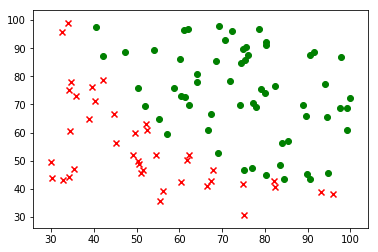

In [42]:
x1 = train_data[:, 0]
x2 = train_data[:, 1]
y = train_data[:, -1:]

for x1p, x2p, yp in zip(x1, x2, y):
    if yp == 0:
        plt.scatter(x1p, x2p, marker='x', c='r')
    else:
        plt.scatter(x1p, x2p, marker='o', c='g')

其中，我们用 `红色的x` 代表 `没有被录取`，用 `绿色的o` 代表 `被录取`。

其次我们将训练得出的决策边界 `XW + b = 0` 表示到图表上：

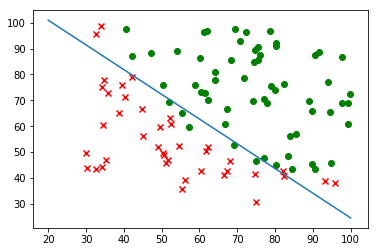

In [48]:
x1 = train_data[:, 0]
x2 = train_data[:, 1]
y = train_data[:, -1:]

for x1p, x2p, yp in zip(x1, x2, y):
    if yp == 0:
        plt.scatter(x1p, x2p, marker='x', c='r')
    else:
        plt.scatter(x1p, x2p, marker='o', c='g')
# 根据参数得到直线
x = np.linspace(20, 100, 10)
y = []
for i in x:
    y.append((i * -w[1] - b) / w[0])
    
plt.plot(x, y)
plt.show()

In [68]:
W = tf.cast(W, tf.float64)
b = tf.cast(b, tf.float64)

In [69]:
pred = tf.matmul(train_X,W) + b

In [102]:
X

<tf.Tensor 'Placeholder:0' shape=<unknown> dtype=float32>

In [99]:
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(accuracy.eval({X:train_X,y:train_y}))

TypeError: unhashable type: 'list'